In [1]:
import astropy 
import numpy as np
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import numpy.ma as ma
import scipy
from scipy import constants
import scipy.integrate as integrate
from astropy.utils import data
from astropy.utils.data import download_file
from astropy import units as u
from spectral_cube import SpectralCube

In [2]:
hdul = fits.open('/home/student04/Downloads/NGC1333_NH3_11_all_rebase3_maps/NGC1333_NH3_11_all_rebase3_trim.fits')
image_data = hdul[0].data

/opt/python/3.7.3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


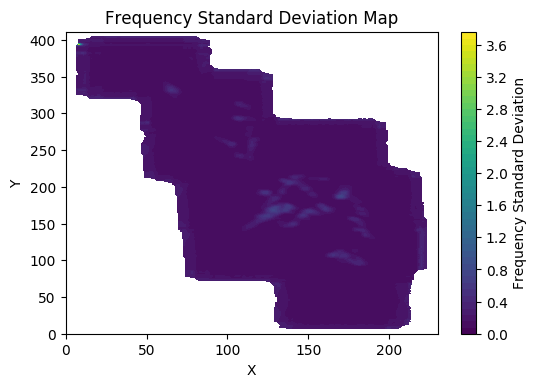

In [3]:
#Noise Map
sigma = np.zeros((412,231))
i = 0
j = 0    
for i in range(231):
    for j in range (412):
        s = np.nanstd(image_data[:,j,i])
        sigma[(j,i)] = s
i = np.arange(0,231,1)
j = np.arange(0,412,1)
X,Y = np.meshgrid(i,j)
plt.figure(dpi=100)
plt.contourf(X,Y,sigma,levels=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Frequency Standard Deviation Map")
plt.colorbar(label="Frequency Standard Deviation",)
plt.show()

In [148]:
noise = np.zeros((412,231))
i = 0
j = 0    
for i in range(231):
    for j in range (412):
        list1 = np.array(image_data[0:300,j,i]).tolist()
        list2 = np.array(image_data[400:762,j,i]).tolist()
        final = list1 + list2
        mask = np.array(final)
        s = np.nanstd(mask)
        noise[(j,i)]=s

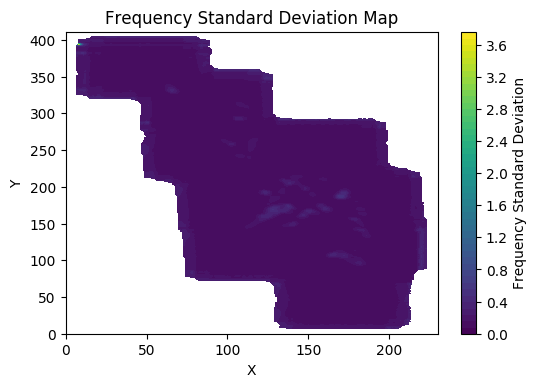

In [149]:
i = np.arange(0,231,1)
j = np.arange(0,412,1)
X,Y = np.meshgrid(i,j)
plt.figure(dpi=100)
plt.contourf(X,Y,noise,levels=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Frequency Standard Deviation Map")
plt.colorbar(label="Frequency Standard Deviation",)
plt.show()

mean: 0.13367826479525688
median: 0.11289010409119471


'\nBoth the mean and the median seem to be fairly good representations of the overall noise level\nif we omit the emission line regions.\n'

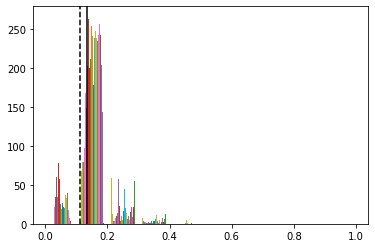

In [150]:
plt.hist(noise,bins=10,range=(0.0,1.0))
plt.axvline(np.nanmean(noise),color='k',linestyle='solid')
plt.axvline(np.nanmedian(noise),color='k',linestyle='dashed')
print('mean:',np.nanmean(noise))
print('median:',np.nanmedian(noise))

'''
Both the mean and the median seem to be fairly good representations of the overall noise level
if we omit the emission line regions.
'''

In [151]:
mu = np.nanmedian(noise)

In [152]:
cube_raw = SpectralCube.read(hdul)
cube = cube_raw.with_spectral_unit(u.km/u.s,velocity_convention='radio')

INFO: Auto-setting vmin to -3.229e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.230e+01 [aplpy.core]


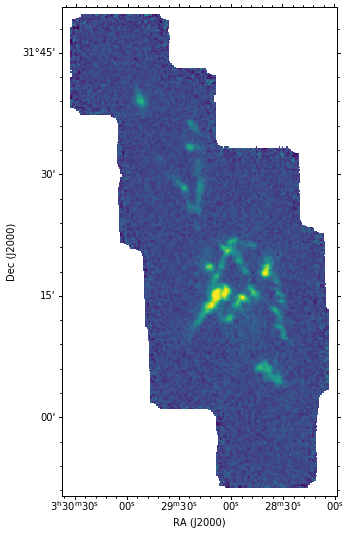

In [153]:
moment_0 = cube.moment(order=0)
import aplpy
f = aplpy.FITSFigure(moment_0.hdu)
f.show_colorscale()

In [154]:
print(moment_0.wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 52.326906821485  31.3410216113  
CRPIX : 115.5  206.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0024440485689343  0.0024440485689343  
NAXIS : 0  0


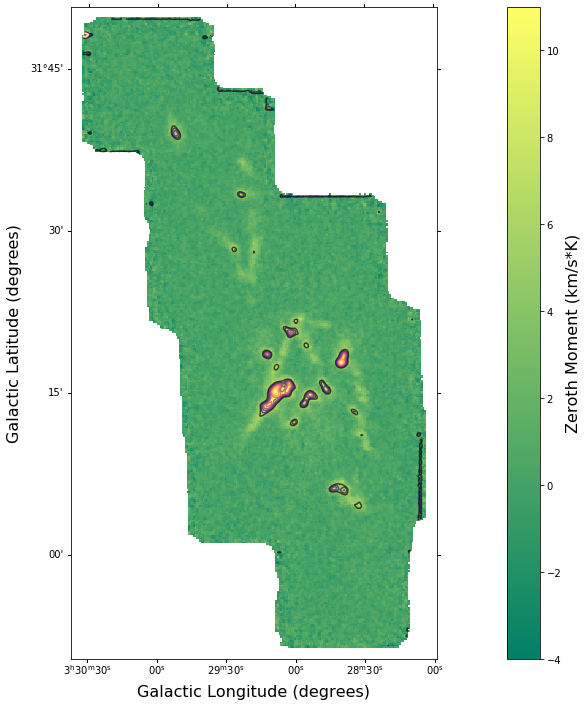

In [156]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111,projection = moment_0.wcs)
i= ax.imshow(moment_0.hdu.data,cmap = 'summer',vmin=-4,vmax=11)
ax.set_xlabel("Galactic Longitude (degrees)", fontsize=16)
ax.set_ylabel("Galactic Latitude (degrees)", fontsize=16)
cbar = plt.colorbar(i, pad=.07)
cbar.set_label('Zeroth Moment (km/s*K)', size=16)
levels = (3*mu,3.5*mu,4*mu,4.5*mu,5.0*mu,5.5*mu,6.0*mu,6.5*mu) 
ax.contour(sigma,alpha=0.7,cmap='magma',levels=levels)